# Import Libraries

In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [28]:
df = pd.read_csv("Customer Data.csv", delimiter=';')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Exploratory Data Analysis

In [29]:
df.shape

(8950, 18)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [31]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [32]:
#fill mean value in missing values

df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [33]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [34]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [35]:
#drop id column 
df.drop(columns=['CUST_ID'], inplace=True)

In [36]:
df.shape

(8950, 17)

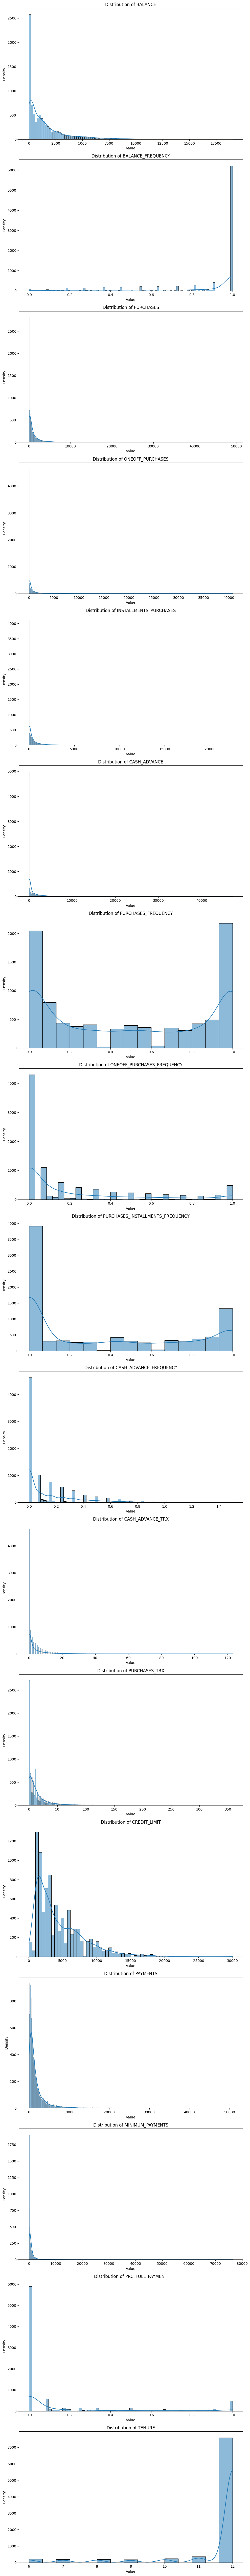

In [37]:
fig, axs = plt.subplots(nrows=len(df.columns), figsize=(10, 6*len(df.columns)))
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

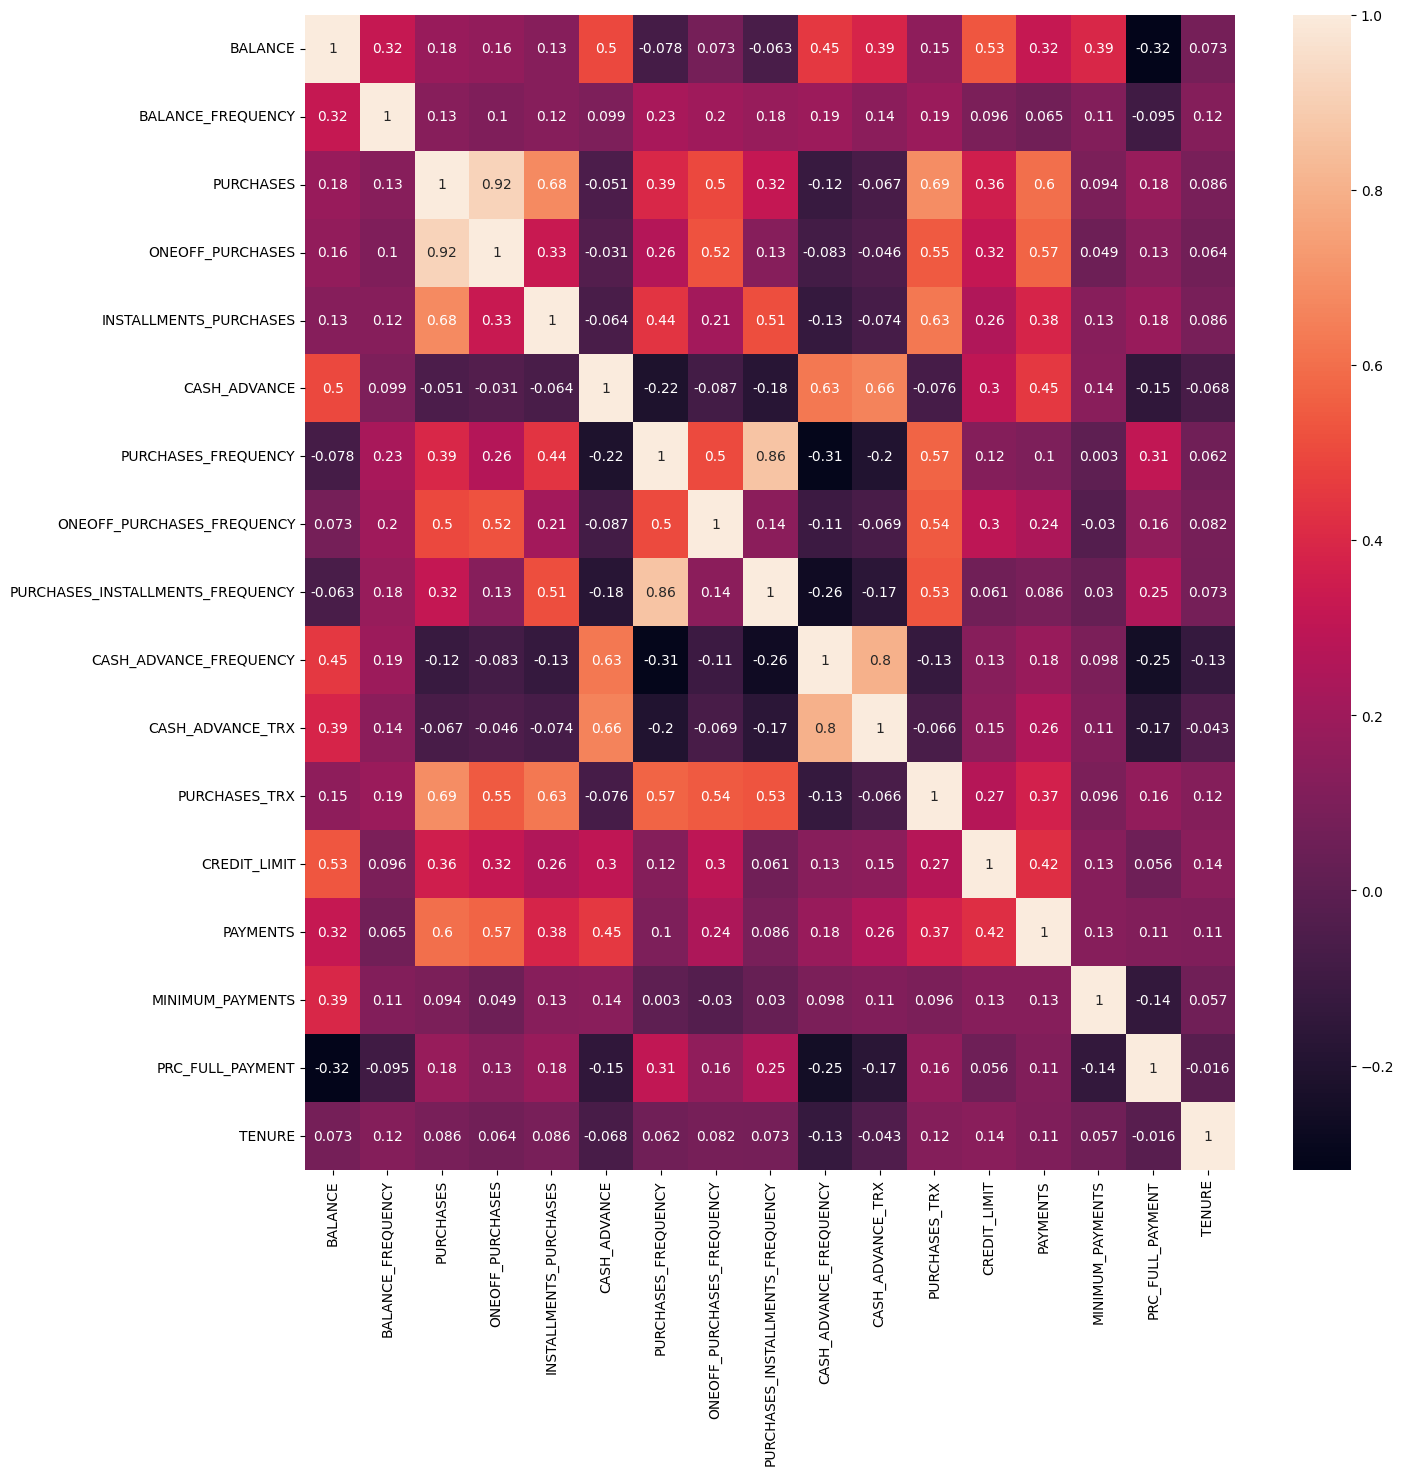

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [39]:
# Find strong relationships exceeding 0.6 absolute value
strong_relationships = df.corr().abs() > 0.6

# Filter out non-strong relationships and their corresponding correlation coefficients
strong_relationships_values = df.corr()[strong_relationships]

# Create a set to keep track of printed relationships
printed_relationships = set()

# Create a list to store the strong relationships
strong_relationships_list = []

# Add the strong relationships to the list
for column in strong_relationships_values.columns:
    for index, value in strong_relationships_values[column].items():
        if value and column != index and abs(df.corr()[column][index]) > 0.6:  # Exclude self-correlations and correlations less than 0.6
            # Check if the relationship or its reverse has already been added
            if (index, column) not in printed_relationships:
                printed_relationships.add((column, index))
                strong_relationships_list.append((column, index, abs(df.corr()[column][index])))

# Sort the list by correlation values in decreasing order
strong_relationships_list.sort(key=lambda x: x[2], reverse=True)

# Print strong relationships 
print("Strong Relationships (|Correlation| > 0.6) in decreasing order:")
for feature1, feature2, correlation in strong_relationships_list:
    print(f"Features {feature1} and {feature2}: {correlation:.2f}")

Strong Relationships (|Correlation| > 0.6) in decreasing order:
Features PURCHASES and ONEOFF_PURCHASES: 0.92
Features PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY: 0.86
Features CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX: 0.80
Features PURCHASES and PURCHASES_TRX: 0.69
Features PURCHASES and INSTALLMENTS_PURCHASES: 0.68
Features CASH_ADVANCE and CASH_ADVANCE_TRX: 0.66
Features CASH_ADVANCE and CASH_ADVANCE_FREQUENCY: 0.63
Features INSTALLMENTS_PURCHASES and PURCHASES_TRX: 0.63
Features PURCHASES and PAYMENTS: 0.60


# Dimensionality reduction (PCA)

In [40]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [41]:
pca = PCA(n_components=2)
pca.fit(scaled_df)

principal_coponents = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_coponents, columns=['PCA1','PCA2'])
pca_df

,PCA1,PCA2
0,-1.682221,-1.076451
1,-1.138285,2.506502
2,0.969696,-0.383488
3,-0.873642,0.043141
4,-1.599430,-0.688574
...,...,...
8945,-0.359635,-2.016160
8946,-0.564381,-1.639151
8947,-0.926210,-1.810801
8948,-2.336550,-0.657969


# Hyper parameter tuning 
finding k elbow method 

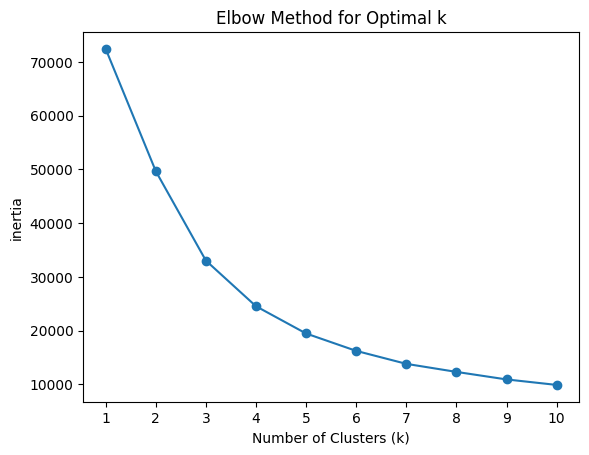

In [42]:
inertia = []
k_values = range(1, 11)


for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)


plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('inertia')
plt.xticks(k_values)
plt.show()

# Model building (Kmeans)

In [43]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_df)
pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster' : kmeans.labels_})], axis = 1)

# Visualising clustered df

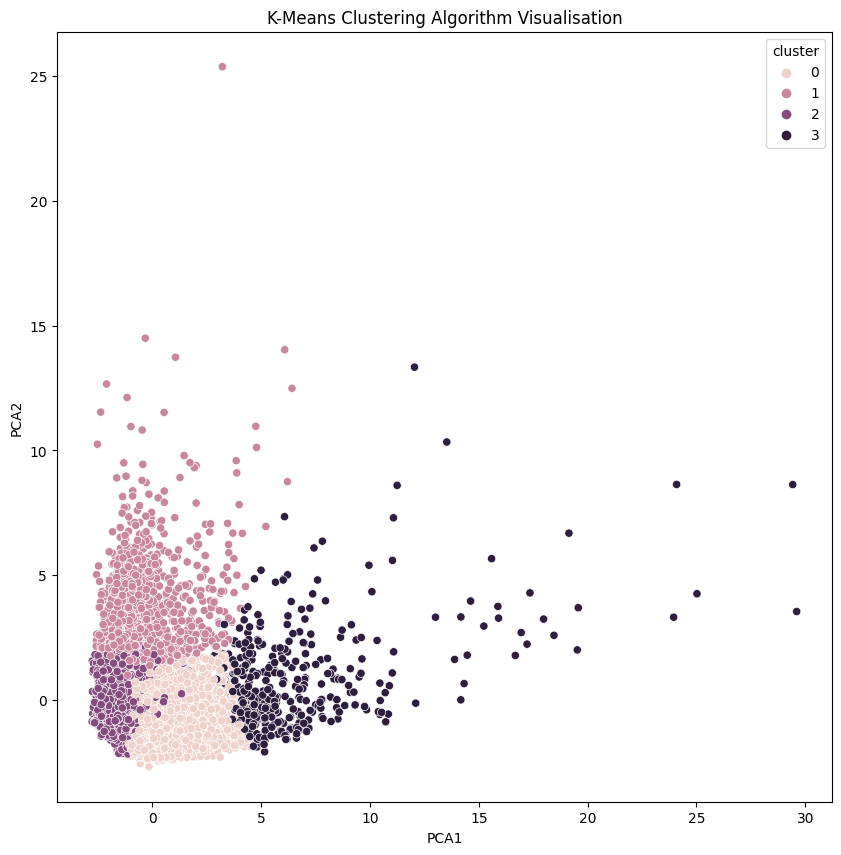

In [44]:
plt.figure(figsize= (10,10))
ax=sns.scatterplot(x='PCA1', y ='PCA2', hue="cluster", data= pca_df_kmeans)
plt.title("K-Means Clustering Algorithm Visualisation")
plt.show()

In [46]:

# Get the cluster centroids in the original feature space
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame for cluster centroids
centroids_df = pd.DataFrame(cluster_centers, columns=df.columns) 

print(centroids_df)

       BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0   894.907458           0.934734  1236.178934        593.974874   
1  4602.462714           0.968415   501.896219        320.373681   
2  1011.751528           0.789871   269.973466        209.853863   
3  3551.153761           0.986879  7681.620098       5095.878826   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              642.478274    210.570626             0.885165   
1              181.607404   4520.724309             0.287731   
2               60.386625    595.759339             0.170146   
3             2587.208264    653.638891             0.946418   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.297070                          0.711842   
1                    0.138934                          0.185516   
2                    0.086281                          0.080578   
3                    0.739031                          0.788060   

  

In [47]:
# Iterate over each cluster
for cluster_num in centroids_df.index:
    print(f"Cluster {cluster_num}:")
    
    # Get the centroid values for the current cluster
    centroid_values = centroids_df.loc[cluster_num]
    
    # Find the feature with the highest centroid value
    most_explained_feature = centroid_values.idxmax()
    
    # Get the value of the most explained feature
    most_explained_feature_value = centroid_values.max()
    
    # Print the most explained feature and its value for the current cluster
    print(f"Most Explained Feature: {most_explained_feature} - Centroid Value: {most_explained_feature_value:.2f}")
    
    # Print other features and their values in descending order
    other_features = centroid_values.drop(index=most_explained_feature)
    other_features_sorted = other_features.sort_values(ascending=False)
    
    for feature, value in other_features_sorted.items():
        print(f"{feature}: {value:.2f}")
    
    print()  # Empty line for better readability

Cluster 0:
Most Explained Feature: CREDIT_LIMIT - Centroid Value: 4213.21
PAYMENTS: 1332.19
PURCHASES: 1236.18
BALANCE: 894.91
MINIMUM_PAYMENTS: 650.17
INSTALLMENTS_PURCHASES: 642.48
ONEOFF_PURCHASES: 593.97
CASH_ADVANCE: 210.57
PURCHASES_TRX: 22.09
TENURE: 11.59
BALANCE_FREQUENCY: 0.93
PURCHASES_FREQUENCY: 0.89
CASH_ADVANCE_TRX: 0.79
PURCHASES_INSTALLMENTS_FREQUENCY: 0.71
ONEOFF_PURCHASES_FREQUENCY: 0.30
PRC_FULL_PAYMENT: 0.27
CASH_ADVANCE_FREQUENCY: 0.04

Cluster 1:
Most Explained Feature: CREDIT_LIMIT - Centroid Value: 7546.96
BALANCE: 4602.46
CASH_ADVANCE: 4520.72
PAYMENTS: 3481.15
MINIMUM_PAYMENTS: 2008.25
PURCHASES: 501.90
ONEOFF_PURCHASES: 320.37
INSTALLMENTS_PURCHASES: 181.61
CASH_ADVANCE_TRX: 14.28
TENURE: 11.39
PURCHASES_TRX: 7.66
BALANCE_FREQUENCY: 0.97
CASH_ADVANCE_FREQUENCY: 0.48
PURCHASES_FREQUENCY: 0.29
PURCHASES_INSTALLMENTS_FREQUENCY: 0.19
ONEOFF_PURCHASES_FREQUENCY: 0.14
PRC_FULL_PAYMENT: 0.03

Cluster 2:
Most Explained Feature: CREDIT_LIMIT - Centroid Value: 3277.70


In [48]:
df['Cluster'] = kmeans.labels_
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


<Axes: xlabel='Cluster', ylabel='count'>

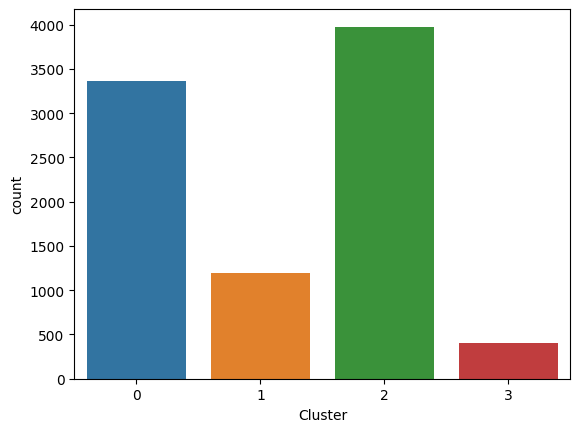

In [49]:
sns.countplot(x='Cluster', data = df)

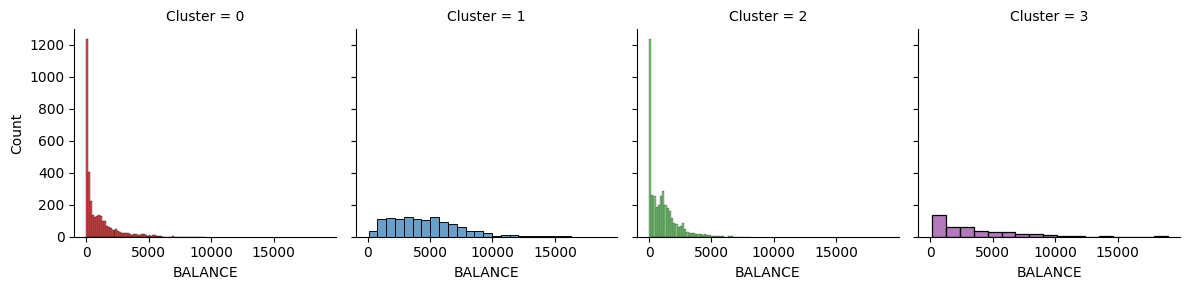

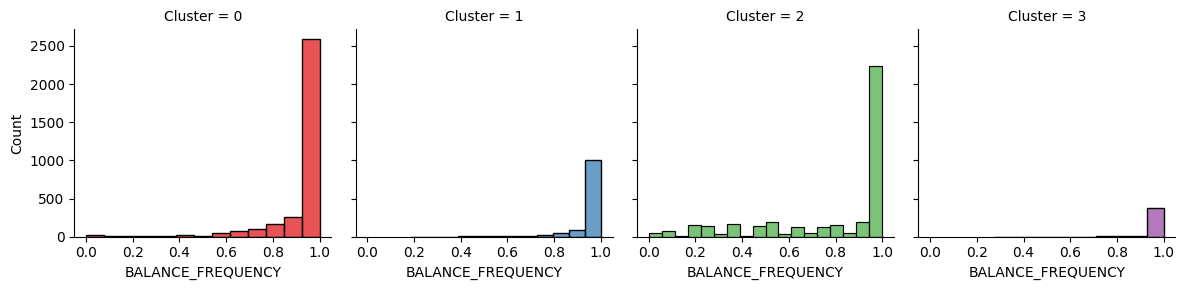

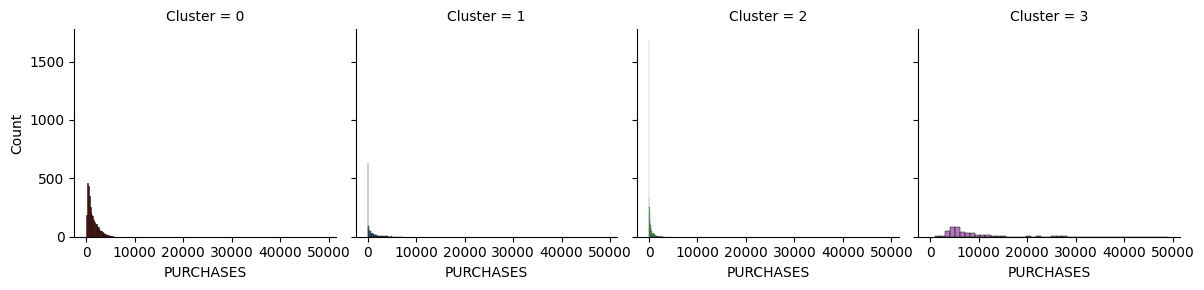

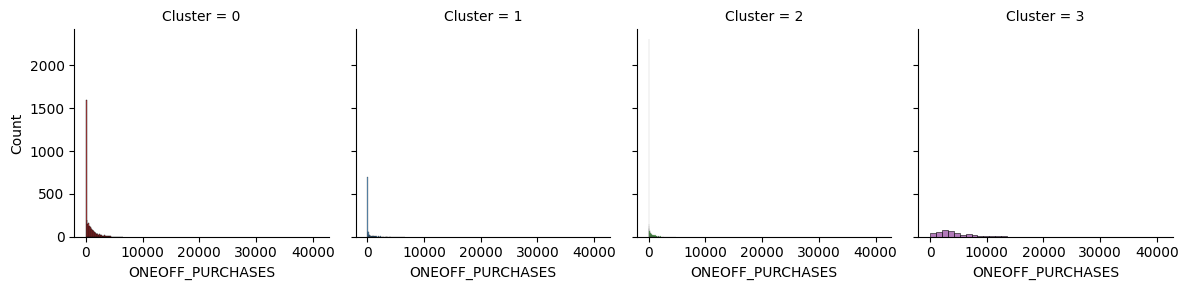

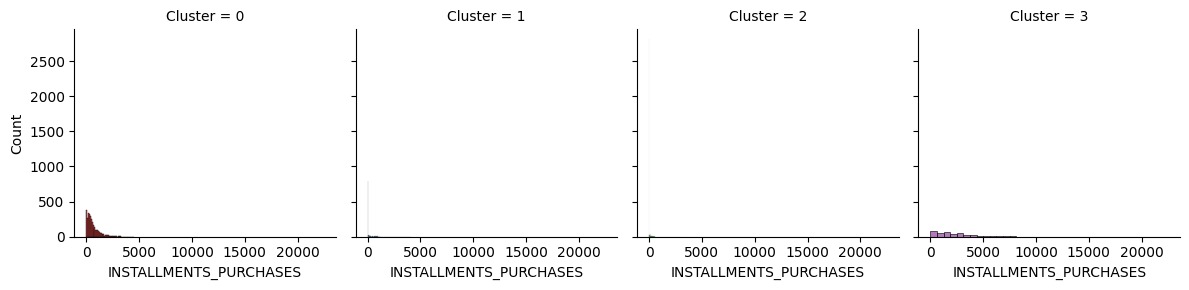

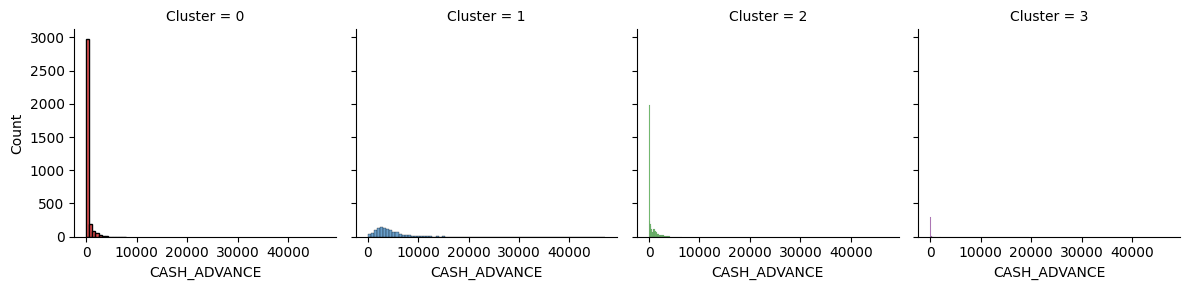

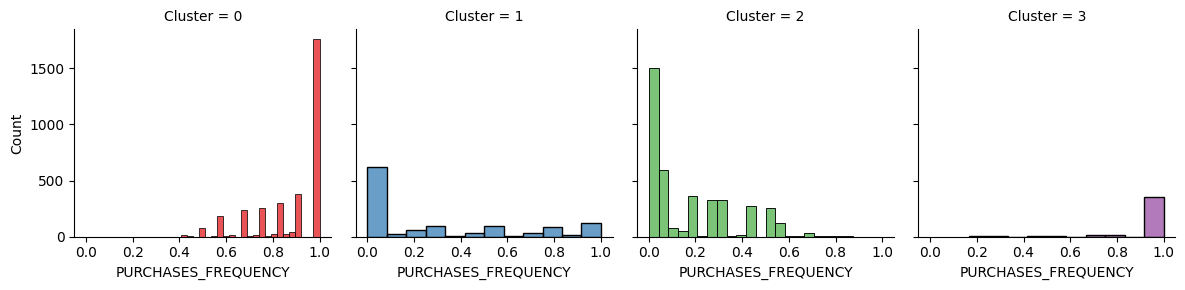

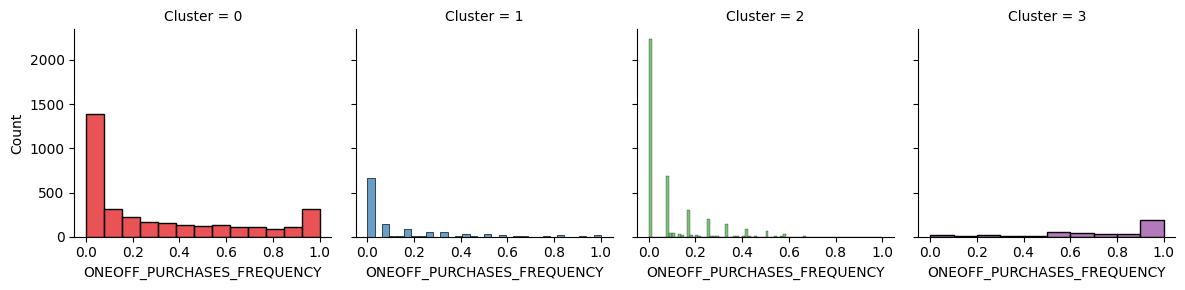

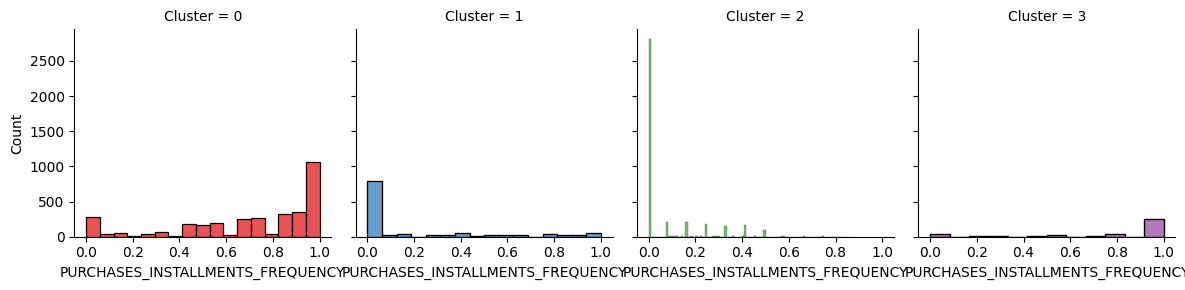

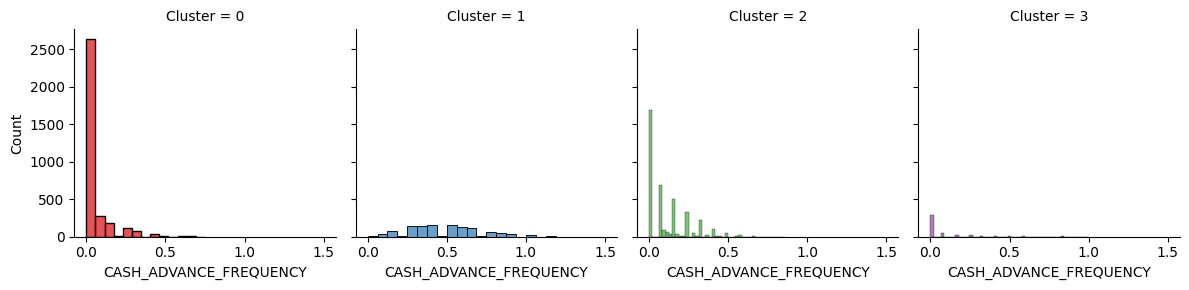

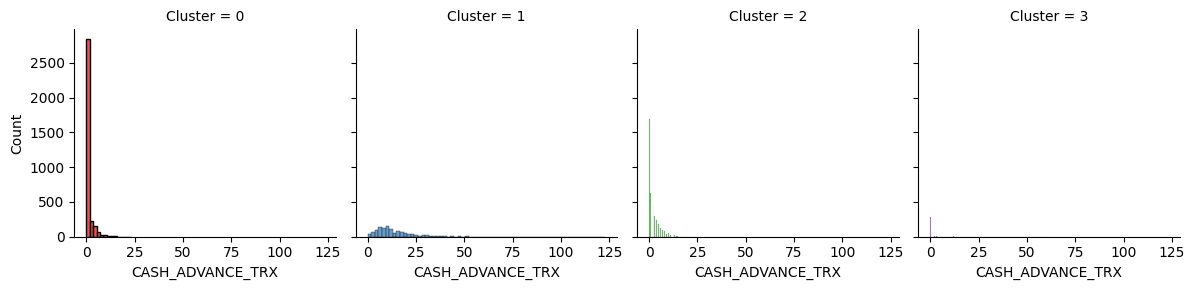

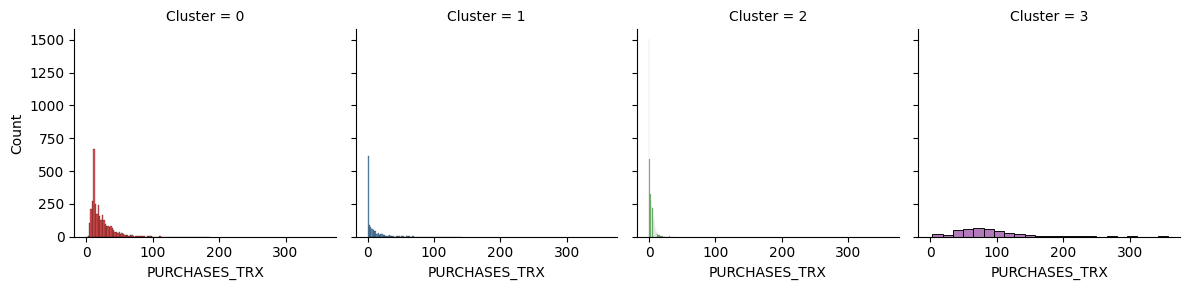

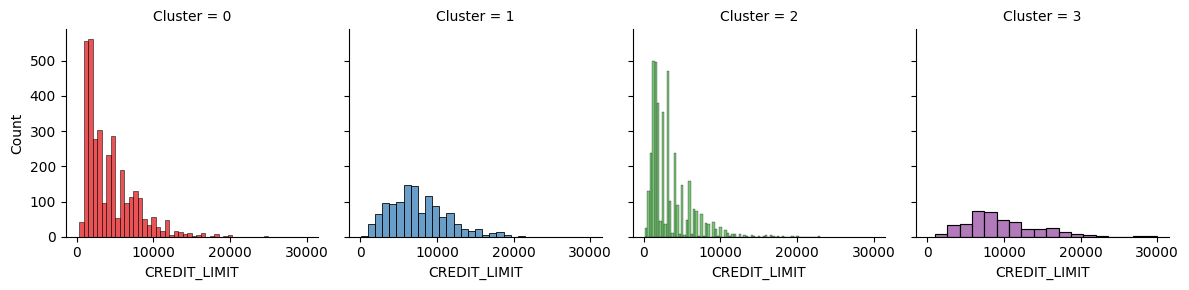

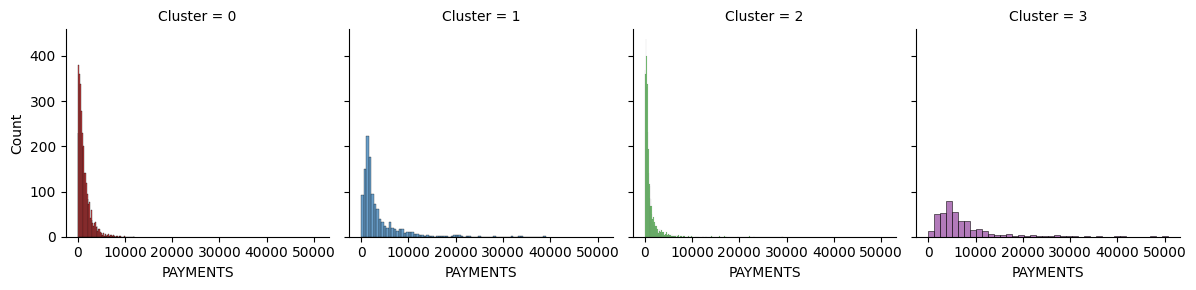

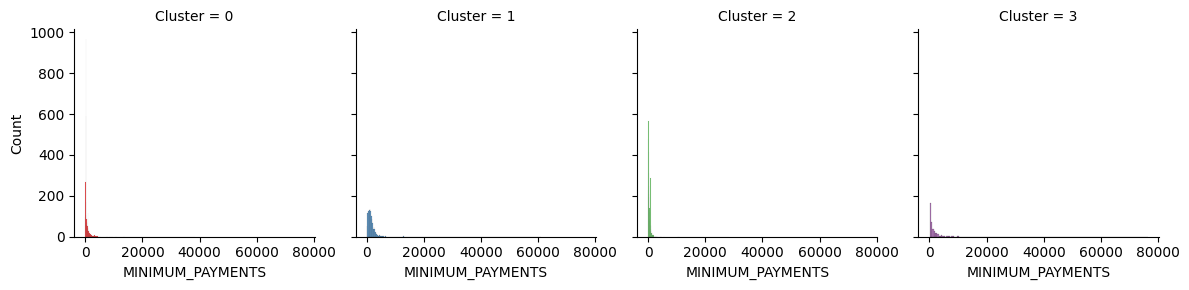

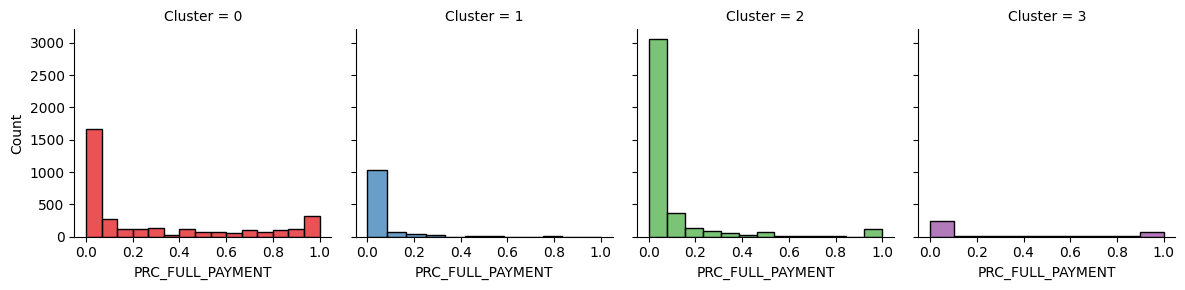

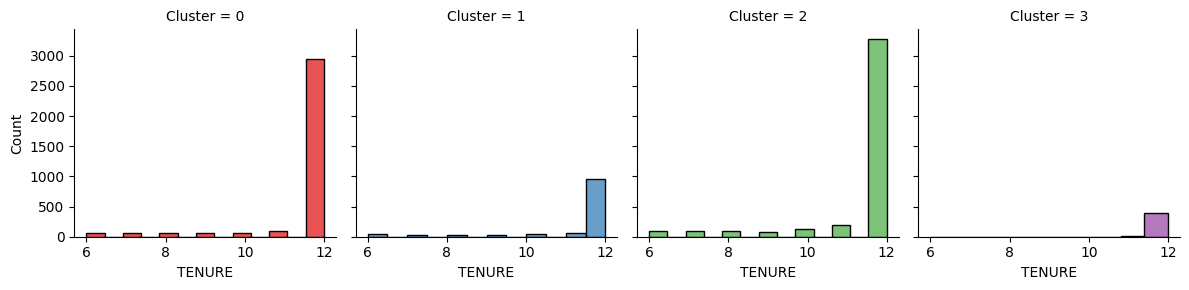

In [50]:
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = kmeans.labels_


for c in df_with_clusters.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(df_with_clusters, col="Cluster", hue= "Cluster", palette="Set1", col_wrap=4)
    grid= grid.map(sns.histplot, c)
plt.show()

# Save Kmeans model and df with clusters

In [59]:
#Saving Scikitlearn models
import pickle
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f, protocol=4)


In [52]:
df_with_clusters.to_csv('Customer Data with clusters.csv')

# Training and Testing model using decision trees

In [53]:

df_with_clusters = pd.read_csv('Customer Data with clusters.csv')

X = df_with_clusters.drop(columns=['Cluster'])  # Features
y = df_with_clusters['Cluster']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9357541899441341


In [60]:
#save decision tree model
with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(decision_tree, f, protocol=4)

In [61]:
import sklearn
print(sklearn.__version__)

1.1.3


In [62]:
import sys
print(sys.executable)

c:\Users\surface\AppData\Local\Programs\Python\Python311\python.exe


In [ ]:
pip install --upgrade scikit-learn==1.4.1.post1